In [1]:
import os
import random
import math
import matplotlib.pyplot as plt
from glob import glob

import tensorflow as tf

In [2]:
import os
import pathlib
from pathlib import __file__
import sys

sys.dont_write_bytecode = True

sys.path.insert(0, pathlib.Path().absolute().parent.parent.parent.__str__())
sys.path.append(os.path.join(os.path.dirname(__file__), "../../../../src"))

from LSC_recognizer_model.src.utils.sign_dataset import SignDataset, SignDatasetImageDatasetFromDirectory, SignDatasetImageDataGenerator
dataset_path = '../../data/raw/Signs'

In [3]:
# Load Timer
%load_ext autotime

time: 215 µs (started: 2022-08-18 11:46:55 -05:00)


2022-08-18 11:46:55.488505: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shape of the image: (TensorShape([32, 256, 256, 3]),)
Shape of the label: (32, 19)
Image : [[[0.7607843  0.7764706  0.6392157 ]
  [0.8699755  0.8817402  0.7601716 ]
  [0.77144605 0.79105395 0.6655637 ]
  ...
  [0.80857843 0.9105392  0.7223039 ]
  [0.8496324  0.96727943 0.77120095]
  [0.54650354 0.66807216 0.50728786]]

 [[0.863063   0.87874925 0.74149436]
  [0.8039216  0.81960785 0.68235296]
  [0.81764704 0.82941175 0.7078431 ]
  ...
  [0.8403186  0.9556373  0.7642157 ]
  [0.81262255 0.9302696  0.7341912 ]
  [0.733161   0.84296495 0.68610215]]

 [[0.98035    0.9960363  0.85093826]
  [0.7796569  0.79534316 0.6580882 ]
  [0.77836245 0.7940487  0.65679383]
  ...
  [0.73550475 0.84530866 0.6931028 ]
  [0.6693704  0.7791743  0.6223116 ]
  [0.8562462  0.955553   0.8544079 ]]

 ...

 [[0.5797373  0.19542356 0.09738434]
  [0.5647059  0.18039216 0.08235294]
  [0.5568628  0.16470589 0.07058824]
  ...
  [0.16237745 0.11446078 0.10502451]
  [0.4936236  0.5328393  0.52891773]
  [0.77863437 0.802163

2022-08-18 11:46:56.266450: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


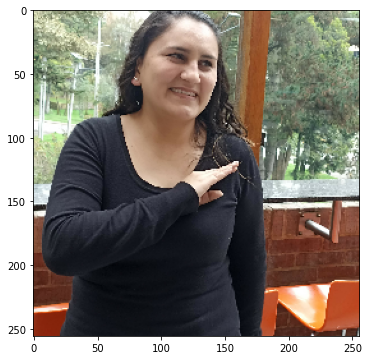

time: 1.25 s (started: 2022-08-18 11:46:55 -05:00)


In [4]:
faster_dataset = SignDataset(path=dataset_path, shuffle=False)
ds1 = faster_dataset.get_dataset()
steps_per_epoch = faster_dataset.get_recomend_steps_per_epoch()
one_batch = ds1.take(1)
plt.figure(figsize=(6, 6))
for i, l in one_batch:
    print(f"Shape of the image: {i.shape,}")
    print(f"Shape of the label: {l.shape}")
    print(f"Image : {i[0]}")
    print(f"Label: {l[0]}")
    plt.imshow(i[0].numpy().astype("float32"))

Shape of the image: (TensorShape([32, 256, 256, 3]),)
Shape of the label: (32, 19)
Image : [[[0.83107    0.8467563  0.7095014 ]
  [0.9242149  0.9359796  0.814411  ]
  [0.93239504 0.9480813  0.8108264 ]
  ...
  [0.902451   0.95735294 0.90637255]
  [0.94620097 1.         0.95012254]
  [0.87941176 0.9343137  0.8754902 ]]

 [[0.7647059  0.78039217 0.6431373 ]
  [0.9170343  0.92879903 0.8072304 ]
  [0.92426854 0.93603325 0.8144646 ]
  ...
  [0.93333334 0.9843137  0.9490196 ]
  [0.9529412  1.         0.96862745]
  [0.94620097 0.99718136 0.96188724]]

 [[0.78639704 0.8020833  0.6648284 ]
  [0.8621362  0.8739009  0.75233227]
  [0.8796913  0.89929914 0.77380896]
  ...
  [0.8287109  0.8930492  0.8372894 ]
  [0.92157245 0.9764744  0.9223077 ]
  [0.92107844 0.97205883 0.94460785]]

 ...

 [[0.6313726  0.2        0.0627451 ]
  [0.6392157  0.20784314 0.07058824]
  [0.63042665 0.19905408 0.06179917]
  ...
  [0.2620098  0.15686275 0.10281863]
  [0.29694393 0.17929688 0.13615961]
  [0.32941177 0.196078

2022-08-18 11:46:57.899412: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


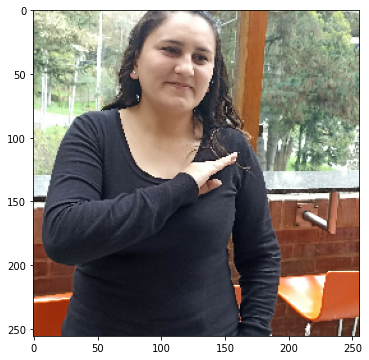

time: 1.67 s (started: 2022-08-18 11:46:56 -05:00)


In [5]:
normal_dataset = SignDataset(path=dataset_path, shuffle=False, fastest_version=False)
ds2 = normal_dataset.get_dataset()
steps_per_epoch = normal_dataset.get_recomend_steps_per_epoch()
one_batch = ds2.take(1)
plt.figure(figsize=(6, 6))
for i, l in one_batch:
  print(f"Shape of the image: {i.shape,}")
  print(f"Shape of the label: {l.shape}")
  print(f"Image : {i[0]}")
  print(f"Label: {l[0]}")
  plt.imshow(i[0].numpy().astype("float32"))

Shape of the image: (TensorShape([32, 256, 256, 3]),)
Shape of the label: (32, 19)
Image : [[[211.92285  215.92285  180.92285 ]
  [235.6748   238.6748   207.6748  ]
  [237.76074  241.76074  206.76074 ]
  ...
  [230.125    244.125    231.125   ]
  [241.28125  255.       242.28125 ]
  [224.25     238.25     223.25    ]]

 [[195.       199.       164.      ]
  [233.84375  236.84375  205.84375 ]
  [235.68848  238.68848  207.68848 ]
  ...
  [238.       251.       242.      ]
  [243.       255.       247.      ]
  [241.28125  254.28125  245.28125 ]]

 [[200.53125  204.53125  169.53125 ]
  [219.84473  222.84473  191.84473 ]
  [224.32129  229.32129  197.32129 ]
  ...
  [211.32129  227.72754  213.50879 ]
  [235.00098  249.00098  235.18848 ]
  [234.875    247.875    240.875   ]]

 ...

 [[161.        51.        16.      ]
  [163.        53.        18.      ]
  [160.75879   50.75879   15.758789]
  ...
  [ 66.8125    40.        26.21875 ]
  [ 75.7207    45.720703  34.720703]
  [ 84.        50.    

2022-08-18 11:46:59.424535: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


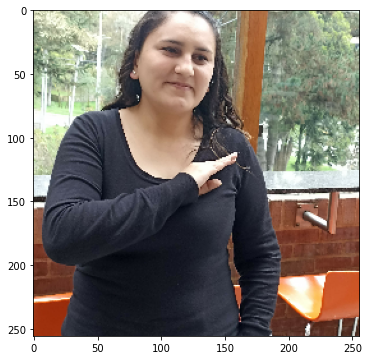

time: 1.49 s (started: 2022-08-18 11:46:58 -05:00)


In [6]:
new_dataset = SignDataset.denormalize_image(ds2)
ds3 = new_dataset.take(1)
plt.figure(figsize=(6, 6))
for i, l in ds3:
  print(f"Shape of the image: {i.shape,}")
  print(f"Shape of the label: {l.shape}")
  print(f"Image : {i[0]}")
  print(f"Label: {l[0]}")
  plt.imshow(i[0].numpy().astype("uint8"))

Found 1858 files belonging to 19 classes.
Shape of the image: (TensorShape([32, 256, 256, 3]),)
Shape of the label: (32, 19)
Image : [[[0.83107    0.8467563  0.7095014 ]
  [0.9242149  0.9359796  0.814411  ]
  [0.93239504 0.9480813  0.8108264 ]
  ...
  [0.902451   0.95735294 0.90637255]
  [0.94620097 1.         0.95012254]
  [0.87941176 0.9343137  0.8754902 ]]

 [[0.7647059  0.78039217 0.6431373 ]
  [0.9170343  0.92879903 0.8072304 ]
  [0.92426854 0.93603325 0.8144646 ]
  ...
  [0.93333334 0.9843137  0.9490196 ]
  [0.9529412  1.         0.96862745]
  [0.94620097 0.99718136 0.96188724]]

 [[0.78639704 0.8020833  0.6648284 ]
  [0.8621362  0.8739009  0.75233227]
  [0.8796913  0.89929914 0.77380896]
  ...
  [0.8287109  0.8930492  0.8372894 ]
  [0.92157245 0.9764744  0.9223077 ]
  [0.92107844 0.97205883 0.94460785]]

 ...

 [[0.6313726  0.2        0.0627451 ]
  [0.6392157  0.20784314 0.07058824]
  [0.63042665 0.19905408 0.06179917]
  ...
  [0.2620098  0.15686275 0.10281863]
  [0.29694393 0.1

2022-08-18 11:47:01.315314: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


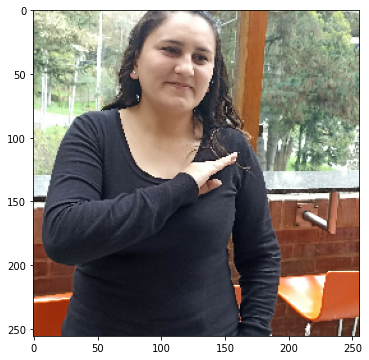

time: 1.62 s (started: 2022-08-18 11:47:00 -05:00)


In [7]:
image_from_dir_dataset = SignDatasetImageDatasetFromDirectory(path=dataset_path, shuffle=False)
ds4 = image_from_dir_dataset.get_dataset()
steps_per_epoch = image_from_dir_dataset.get_recomend_steps_per_epoch()
one_batch = ds4.take(1)
plt.figure(figsize=(6, 6))
for i, l in one_batch:
  print(f"Shape of the image: {i.shape,}")
  print(f"Shape of the label: {l.shape}")
  print(f"Image : {i[0]}")
  print(f"Label: {l[0]}")
  plt.imshow(i[0].numpy().astype("float32"))

Found 1858 images belonging to 19 classes.
Shape of the image: ((32, 256, 256, 3),)
Shape of the label: (32, 19)
Image : [[[0.8352942  0.83921576 0.7137255 ]
  [0.93725497 0.94117653 0.8196079 ]
  [0.9450981  0.9490197  0.8235295 ]
  ...
  [0.8980393  0.9490197  0.909804  ]
  [0.9450981  0.9960785  0.9568628 ]
  [0.8745099  0.9294118  0.8705883 ]]

 [[0.7725491  0.77647066 0.6509804 ]
  [0.92549026 0.9294118  0.8078432 ]
  [0.9294118  0.9333334  0.8117648 ]
  ...
  [0.9333334  0.9843138  0.9568628 ]
  [0.95294124 1.         0.97647065]
  [0.9490197  1.         0.9725491 ]]

 [[0.78823537 0.79215693 0.6666667 ]
  [0.87843144 0.882353   0.7607844 ]
  [0.89019614 0.909804   0.7843138 ]
  ...
  [0.83921576 0.90196085 0.85098046]
  [0.92549026 0.9803922  0.9294118 ]
  [0.9215687  0.9686275  0.95294124]]

 ...

 [[0.6392157  0.19607845 0.0627451 ]
  [0.6509804  0.20784315 0.07450981]
  [0.6392157  0.19607845 0.0627451 ]
  ...
  [0.26666668 0.15686275 0.10980393]
  [0.30588236 0.1764706  0.14

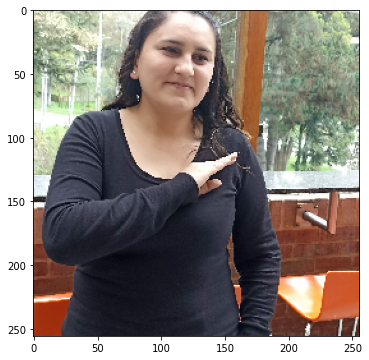

time: 3.83 s (started: 2022-08-18 11:47:01 -05:00)


In [8]:
image_data_gen_dataset = SignDatasetImageDataGenerator(path=dataset_path, shuffle=False)
ds5 = image_data_gen_dataset.get_dataset()
steps_per_epoch = image_data_gen_dataset.get_recomend_steps_per_epoch()
i, l = ds5.next()
plt.figure(figsize=(6, 6))
print(f"Shape of the image: {i.shape,}")
print(f"Shape of the label: {l.shape}")
print(f"Image : {i[0]}")
print(f"Label: {l[0]}")
plt.imshow(i[0].astype("float32"))

In [9]:
# Disable Timer
%unload_ext autotime